**Maestría en Informática - PUCP - Aprendizaje Automático**

**Proyecto Grupal 2022-1**

# **Complicaciones en pacientes que sufrieron infarto al miocardio**

Repositorio: https://github.com/dp202204/Proyecto-ML-2022

In [112]:
import pandas as pd

In [113]:
# Carga de datos - Pacientes que sufrieron infarto al miocardio y sus complicaciones
# Datos utilizados:
# Myocardial infarction complications Data Set
# Center for Machine Learning and Intelligent Systems, Bren School of Information and Computer Science, University of California, Irvine

mic_data1 = pd.read_csv('https://leicester.figshare.com/ndownloader/files/23581310')

In [114]:
mic_data1.shape

(1700, 124)

In [115]:
# Recolección de información general acerca de las columnas y su contenido

cant_col_nan      = 0
cant_col_sin_nan  = 0
cant_col_num      = 0
cant_col_binarias = 0

for col in mic_data1:
  #Determinamos cuantas columna son numericas
  if pd.api.types.is_numeric_dtype(mic_data1[col]):
    cant_col_num = cant_col_num + 1
    if mic_data1[col].nunique() == 2:
      cant_col_binarias = cant_col_binarias + 1
  #Determinamos que columnas tienen datos faltantes
  if mic_data1[col].isna().sum() > 0:
    cant_col_nan = cant_col_nan + 1
  else:
     cant_col_sin_nan = cant_col_sin_nan + 1

In [116]:
cant_col_mic_data1 = mic_data1.shape[1]
print('Total de columnas en el conjunto de datos: ',cant_col_mic_data1)
print('Total de columnas numericas:               ',cant_col_num, ' (', '%.1f%%' % (100*cant_col_num/cant_col_mic_data1),')')
print('Total de columnas numericas binarias:       ',cant_col_binarias, ' (', '%.1f%%' % (100*cant_col_binarias/cant_col_mic_data1),')')
print('Total de columnas con datos faltantes:     ',cant_col_nan, ' (', '%.1f%%' % (100*cant_col_nan/cant_col_mic_data1),')')
print('Total de columnas con datos completos:      ',cant_col_sin_nan, ' (Para comprobación)')

Total de columnas en el conjunto de datos:  124
Total de columnas numericas:                124  ( 100.0% )
Total de columnas numericas binarias:        89  ( 71.8% )
Total de columnas con datos faltantes:      110  ( 88.7% )
Total de columnas con datos completos:       14  (Para comprobación)


Todas las columnas son numéricas. Algunas son enteras y otras de punto flotante.

89 columnas (71.8%) son binarias, es decir, tiene los valores 0 y 1. Por tanto 35 columan tiene datos no binarios, de estas una parte son ordinales y las identificaremos una a una.

La mayoría de las columnas tienen datos faltantes (88.7%).

In [117]:
# Recoleccion de características más específicas de los datos por columna: Datos unicos, datos faltantes

cant_filas_mic_data1 = mic_data1.shape[0]
mic_caract = pd.DataFrame(mic_data1.nunique(),columns=['Datos_Unicos'])
mic_caract['Faltantes'] = mic_data1.isna().sum() / cant_filas_mic_data1 * 100
# mic_data.nunique().hist()
# mic_data.nunique()

In [118]:
print ('Columnas con mayor cantidad de datos únicos')
print ()
mic_caract.sort_values('Datos_Unicos', ascending = False)['Datos_Unicos'].head(37)

Columnas con mayor cantidad de datos únicos



ID             1700
L_BLOOD         174
ALT_BLOOD        69
AGE              62
ROE              58
AST_BLOOD        58
K_BLOOD          51
NA_BLOOD         40
S_AD_ORIT        32
S_AD_KBRIG       30
D_AD_KBRIG       21
D_AD_ORIT        20
TIME_B_S          9
LET_IS            8
DLIT_AG           8
STENOK_AN         7
post_im           5
inf_im            5
lat_im            5
ant_im            5
NA_R_1_n          5
NOT_NA_1_n        5
ZSN_A             5
FK_STENOK         5
KFK_BLOOD         4
R_AB_2_n          4
R_AB_1_n          4
NA_R_2_n          4
NOT_NA_2_n        4
INF_ANAM          4
R_AB_3_n          4
GB                4
NOT_NA_3_n        3
NA_R_3_n          3
IBS_POST          3
NA_KB             2
fibr_ter_06       2
Name: Datos_Unicos, dtype: int64

De acuerdo al análisis de datos únicos, solo la columna ID contiene información que no sería útil.

Descartaremos la columna ID.

In [119]:
print ('Columnas con mayor porcentaje de datos faltantes')
print ()
mic_caract.sort_values('Faltantes', ascending = False)['Faltantes'].head(15)

Columnas con mayor porcentaje de datos faltantes



KFK_BLOOD     99.764706
IBS_NASL      95.764706
S_AD_KBRIG    63.294118
D_AD_KBRIG    63.294118
NOT_NA_KB     40.352941
LID_KB        39.823529
NA_KB         38.647059
GIPER_NA      22.058824
NA_BLOOD      22.058824
K_BLOOD       21.823529
GIPO_K        21.705882
AST_BLOOD     16.764706
ALT_BLOOD     16.705882
S_AD_ORIT     15.705882
D_AD_ORIT     15.705882
Name: Faltantes, dtype: float64

De acuerdo a algunos autores, la proporción de valores faltantes en estudios científicos es muy variable y puede alcanzar niveles de entre 26% to 72% para estudios sobre educación y psicología, siendo valores comunes entre 15% to 20%.

(Yiran Dong, Chao-Ying Joanne Peng, Principled missing data methods for researchers, Springerplus. 2013; 2: 222. Published online 2013 May 14. doi: 10.1186/2193-1801-2-222
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/ )

Notas diversas encontradas en foros de internet sugieren valores entre 25% y 30% como aceptables.

Para el presente trabajo descartaremos las columnas con más de 25% de datos faltantes.

Descartaremos 7 columnas, que serán las siguientes:

- KFK_BLOOD (Serum CPK content). Faltantes: 99.8%

- IBS_NASL (Heredity on CHD)). Faltantes: 95.8%

- S_AD_KBRIG (Systolic blood pressure according to Emergency Cardiology Team). Faltantes: 63.3%

- D_AD_KBRIG (Diastolic blood pressure according to Emergency Cardiology Team). Faltantes: 63.3%

- NOT_NA_KB (Use of NSAIDs by the Emergency Cardiology Team). Faltantes: 40.4%

- LID_KB (Use of lidocaine by the Emergency Cardiology Team). Faltantes: 39.8%

- NA_KB (Use of opioid drugs by the Emergency Cardiology Team). Faltantes: 38.6%

Nota: Todas estas columnas corresponden a datos médicos de los pacientes durante su tratamiento. No contienen información sobre las complicaciones.

In [120]:
# PREPROCESAMIENTO - PASO 1
# Eliminación de columnas con muchos datos únicos y faltantes.
# Se eliminan 8 columnas en total.

mic_data2 = mic_data1.copy()

col_elim = ['ID','KFK_BLOOD','IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','NOT_NA_KB','LID_KB','NA_KB']
mic_data2.drop(col_elim, axis=1, inplace=True)

In [121]:
mic_data2.shape

(1700, 116)

De acuerdo a la descripción de datos, las últimnas 12 columnas tienen informacion sobre las complicaciones.
- Columnas 113 a 123 (número original de columna): Complicaciones específicas. Todas tienen valores binarios.
- Columna 124 (número original de columna) - LET_IS: Causa de resultado letal. Contiene un número: Cero significa que el caso no fue letal. Del 1 al 7 indica la causa de la letalidad.

Analizaremos qué proporción de casos presentaron complicaciones, cuántas complicaciones se pueden presentar en cada caso y qué proporción de casos fueron letales.

In [122]:
col_causas = ['FIBR_PREDS','PREDS_TAH','JELUD_TAH','FIBR_JELUD','A_V_BLOK','OTEK_LANC','RAZRIV','DRESSLER','ZSN','REC_IM','P_IM_STEN']

tuvo_complic = mic_data2[col_causas].sum(axis=1) > 0

# mic_data2['CON_COMPLIC'] = mic_data2[tuvo_complic]
# mic_data2['LETAL'] = mic_data2['LET_IS'] > 0
mic_data2['NUM_COMPLIC'] = mic_data2[col_causas].sum(axis=1)

print('Casos ordenados por número de complicaciones:')
mic_data2.sort_values('NUM_COMPLIC', ascending = False)['NUM_COMPLIC'].head(15)

Casos ordenados por número de complicaciones:


1121    5
1376    5
1163    4
1624    4
1489    4
1374    4
1288    4
1197    4
1194    4
894     4
1226    4
1178    4
1005    4
1022    4
1258    4
Name: NUM_COMPLIC, dtype: int64

**Se aprecia que puede haber casos hasta con 5 complicaciones.**

**Por lo tanto, el modelo predictivo no podría usar las columnas de complicaciones como categoría de clasificación porque no son excluyentes.**

In [123]:
seleccion_casos_complic = mic_data2['NUM_COMPLIC'] > 0
num_casos_complic = len(mic_data2.loc[mic_data2['NUM_COMPLIC'] > 0])

num_casos_let = len(mic_data2.loc[mic_data2['LET_IS'] > 0])

cant_casos_mic_data2 = mic_data2.shape[0]
print('Total de casos en el conjunto de datos: ',cant_casos_mic_data2)
print('Total de casos con complicaciones:      ',num_casos_complic, ' (', '%.1f%%' % (100*num_casos_complic/cant_casos_mic_data2),')')
print('Total de casos letales:                 ',num_casos_let, ' (', '%.1f%%' % (100*num_casos_let/cant_casos_mic_data2),')')


Total de casos en el conjunto de datos:  1700
Total de casos con complicaciones:       935  ( 55.0% )
Total de casos letales:                  271  ( 15.9% )


# El modelo podría enfoarse en predecir si habrá complicaciones en general o si habrá complicacaiones letales.

# De acuerdo a la literatura revisada, las complicaciones son muy comunes (se comprueba con el 55% observado en la en conjunto de datos) y que éstas pueden ser muy leves.

# Para efectos del presente trabajo, nos concentramremos en predecir si puede haber complicaciones letales, que son los casos más importantes.

## Preprocesamiento: Reemplazo de valores nulos

In [124]:
# PREPROCESAMIENTO - PASO 2
# Realizando una copia del data frame
mic_data3 = mic_data2.copy()

### Columnas Binarias

In [125]:
# Recolección de información general acerca de las columnas y su contenido

col_binary_name = []

for col in mic_data3:
  #Determinamos cuantas columna son numericas
    if mic_data3[col].nunique() == 2:
      col_binary_name.append(col)
      
col_binary_name

['SEX',
 'SIM_GIPERT',
 'nr_11',
 'nr_01',
 'nr_02',
 'nr_03',
 'nr_04',
 'nr_07',
 'nr_08',
 'np_01',
 'np_04',
 'np_05',
 'np_07',
 'np_08',
 'np_09',
 'np_10',
 'endocr_01',
 'endocr_02',
 'endocr_03',
 'zab_leg_01',
 'zab_leg_02',
 'zab_leg_03',
 'zab_leg_04',
 'zab_leg_06',
 'O_L_POST',
 'K_SH_POST',
 'MP_TP_POST',
 'SVT_POST',
 'GT_POST',
 'FIB_G_POST',
 'IM_PG_P',
 'ritm_ecg_p_01',
 'ritm_ecg_p_02',
 'ritm_ecg_p_04',
 'ritm_ecg_p_06',
 'ritm_ecg_p_07',
 'ritm_ecg_p_08',
 'n_r_ecg_p_01',
 'n_r_ecg_p_02',
 'n_r_ecg_p_03',
 'n_r_ecg_p_04',
 'n_r_ecg_p_05',
 'n_r_ecg_p_06',
 'n_r_ecg_p_08',
 'n_r_ecg_p_09',
 'n_r_ecg_p_10',
 'n_p_ecg_p_01',
 'n_p_ecg_p_03',
 'n_p_ecg_p_04',
 'n_p_ecg_p_05',
 'n_p_ecg_p_06',
 'n_p_ecg_p_07',
 'n_p_ecg_p_08',
 'n_p_ecg_p_09',
 'n_p_ecg_p_10',
 'n_p_ecg_p_11',
 'n_p_ecg_p_12',
 'fibr_ter_01',
 'fibr_ter_02',
 'fibr_ter_03',
 'fibr_ter_05',
 'fibr_ter_06',
 'fibr_ter_07',
 'fibr_ter_08',
 'GIPO_K',
 'GIPER_NA',
 'NITR_S',
 'LID_S_n',
 'B_BLOK_S_n',
 'AN

In [126]:
len(col_binary_name)

85

In [127]:
# PREPROCESAMIENTO - PASO 3
# Creando procedimiento para reemplazar por la moda
for col in col_binary_name:
  # encontrar la moda de la columna
  moda = mic_data3[col].mode()[0]

  # guardar los nulos
  Col_NaN = mic_data3[mic_data3[col].isnull()].index

  # Imputamos la moda
  mic_data3.loc[Col_NaN,col] = moda


In [128]:
# Verificando si existen nulos en la lista de columnas binarias
cant_col_nan = 0

for col in col_binary_name:
  # Verificar nulos
  if mic_data3[col].isna().sum() > 0:
    cant_col_nan = cant_col_nan + 1

cant_col_nan

0

### Ordinales

In [129]:
# PREPROCESAMIENTO - PASO 4
col_ordinal_name = {'INF_ANAM','STENOK_AN','FK_STENOK','IBS_POST','GB','DLIT_AG','ZSN_A','ant_im','lat_im','inf_im','post_im','TIME_B_S','R_AB_1_n','NA_R_1_n','NOT_NA_1_n','R_AB_2_n','NA_R_2_n','NOT_NA_2_n','R_AB_3_n','NA_R_3_n','NOT_NA_3_n'}


In [130]:
# Creando procedimiento para reemplazar por la moda
for col in col_ordinal_name:
  # encontrar la moda de la columna
  moda = mic_data3[col].mode()[0]

  # guardar los nulos
  Col_NaN = mic_data3[mic_data3[col].isnull()].index

  # Imputamos la moda
  mic_data3.loc[Col_NaN,col] = moda

In [131]:
# Verificando si existen nulos en la lista de columnas binarias
cant_col_nan2 = 0

for col in col_ordinal_name:
  # Verificar nulos
  if mic_data3[col].isna().sum() > 0:
    cant_col_nan2 = cant_col_nan2 + 1

cant_col_nan2

0

### Numericas

In [132]:
# PREPROCESAMIENTO - PASO 5
# Creando procedimiento para reemplazar por la mediana
for col in mic_data3:
  # encontrar la mediana de la columna
  mediana = mic_data3[col].median()

  # Imputar la mediana a los nulos
  mic_data3[col].fillna(mediana, inplace=True)

In [133]:
# Verificando si existen nulos en la lista de columnas binarias
cant_col_nan3 = 0

for col in mic_data3:
  # Verificar nulos
  if mic_data3[col].isna().sum() > 0:
    cant_col_nan3 = cant_col_nan3 + 1

cant_col_nan3

0

## Crear la variable explicada (y)


*   Creamos una columna 



In [134]:
# PREPROCESAMIENTO - PASO 6
# Realizando una copia del data frame
mic_data4 = mic_data3.copy()

In [135]:
# Verificamos los valores de la columna 'LET_IS'
mic_data4['LET_IS'].value_counts()

0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

In [136]:
# PREPROCESAMIENTO - PASO 7
# Diccionario para crear la columna target
Diccionario = {0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1}

# Columna target
mic_data4['LETALIDAD'] = mic_data4['LET_IS']

# Ajuste columna target
mic_data4=mic_data4.replace({ 'LETALIDAD': Diccionario})
  

In [137]:
# Verificamos los valores de la columna 'LETALIDAD'
mic_data4['LETALIDAD'].value_counts()

0    1429
1     271
Name: LETALIDAD, dtype: int64

In [138]:
# PREPROCESAMIENTO - PASO 8
# Borrar las columnas
col_a_eliminar = ['FIBR_PREDS','PREDS_TAH','JELUD_TAH','FIBR_JELUD','A_V_BLOK','OTEK_LANC','RAZRIV','DRESSLER','ZSN','REC_IM','P_IM_STEN', 'LET_IS']
mic_data4.drop(col_a_eliminar, axis=1, inplace=True)

In [139]:
mic_data4.shape

(1700, 106)

## Normalizando los datos

In [140]:
# Obteniendo la lista de columnas no binarias, no ordinales a normalizar
columnas_a_normalizar = []

for col in mic_data4:
  if mic_data4[col].nunique() != 2:
    columnas_a_normalizar.append(col)

# Visualizar las columnas encontradas
columnas_a_normalizar

['AGE',
 'INF_ANAM',
 'STENOK_AN',
 'FK_STENOK',
 'IBS_POST',
 'GB',
 'DLIT_AG',
 'ZSN_A',
 'S_AD_ORIT',
 'D_AD_ORIT',
 'ant_im',
 'lat_im',
 'inf_im',
 'post_im',
 'K_BLOOD',
 'NA_BLOOD',
 'ALT_BLOOD',
 'AST_BLOOD',
 'L_BLOOD',
 'ROE',
 'TIME_B_S',
 'R_AB_1_n',
 'R_AB_2_n',
 'R_AB_3_n',
 'NA_R_1_n',
 'NA_R_2_n',
 'NA_R_3_n',
 'NOT_NA_1_n',
 'NOT_NA_2_n',
 'NOT_NA_3_n',
 'NUM_COMPLIC']

In [141]:
# PREPROCESAMIENTO - PASO 9
# Normalizar los valores entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

estandarizador = MinMaxScaler()
mic_data4[columnas_a_normalizar] = estandarizador.fit_transform(mic_data4[columnas_a_normalizar])
mic_data4.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,NUM_COMPLIC,LETALIDAD
0,0.772727,1,0.666667,0.166667,0.25,1.0,1.000000,0.0,1.000000,0.00,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1,0.439394,1,0.333333,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.00,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0
2,0.393939,1,0.000000,0.000000,0.00,1.0,0.666667,0.0,0.285714,0.00,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,0.636364,0,0.000000,0.000000,0.00,1.0,0.666667,0.0,0.428571,0.25,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.2,0
4,0.515152,1,0.000000,0.000000,0.00,1.0,1.000000,0.0,1.000000,0.00,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [142]:
# Verificando que los valores se encuentren entre 0 y 1 (min y max respectivamente)
mic_data4.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,NUM_COMPLIC,LETALIDAD
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.543369,0.626471,0.184510,0.361961,0.309853,0.592941,0.465490,0.033529,0.407563,0.047059,...,0.039118,0.281765,0.126471,0.669412,0.717647,0.746471,0.017647,0.200588,0.158706,0.159412
std,0.170207,0.483883,0.278749,0.404786,0.257721,0.401084,0.362270,0.180067,0.442421,0.162266,...,0.170945,0.449992,0.332477,0.470563,0.450277,0.435159,0.131704,0.400558,0.181065,0.366167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.424242,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560606,1.000000,0.000000,0.166667,0.500000,0.500000,0.666667,0.000000,0.142857,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.200000,0.000000
75%,0.666667,1.000000,0.333333,0.833333,0.500000,1.000000,0.666667,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.200000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modelando

In [143]:
# PREPROCESAMIENTO - PASO 10
# Realizando una copia del data frame
mic_data5 = mic_data4.copy()

In [144]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report,mean_squared_error, r2_score, roc_curve, roc_auc_score

In [145]:
# Verificamos los valores de la columna 'LETALIDAD'
mic_data5['LETALIDAD'].value_counts()

0    1429
1     271
Name: LETALIDAD, dtype: int64

In [146]:
# PREPROCESAMIENTO - PASO 11
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
x = mic_data5.drop(["LETALIDAD"], axis=1)
y = mic_data5['LETALIDAD']

print("x.shape", x.shape)
print("y.shape", y.shape)

x.shape (1700, 105)
y.shape (1700,)


In [147]:
# PREPROCESAMIENTO - PASO 12
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(f"Train shape: {x_train.shape} {y_train.shape}")
print(f"Test shape: {x_test.shape} {y_test.shape}")

Train shape: (1360, 105) (1360,)
Test shape: (340, 105) (340,)


## MODELO 1: Decission Tree Classifier

In [148]:
#Entrenamos el modelo 1:
model1 = DecisionTreeClassifier(max_depth=5)

model1.fit(x_train, y_train)
model1.score(x_train, y_train)

0.8897058823529411

In [149]:
model1.score(x_test, y_test)

0.8529411764705882

In [150]:
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       287
           1       0.57      0.23      0.32        53

    accuracy                           0.85       340
   macro avg       0.72      0.60      0.62       340
weighted avg       0.82      0.85      0.83       340



## MODELO 2: Random Forest Classifier 

In [151]:
model2 = RandomForestClassifier(n_estimators=15,max_depth=15,bootstrap=True,oob_score=True,n_jobs=-1,random_state=22)
model2.fit(x_train, y_train)
model2.score(x_train, y_train)

0.9830882352941176

In [152]:
model2.score(x_test, y_test)

0.8794117647058823

In [153]:
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       287
           1       0.80      0.30      0.44        53

    accuracy                           0.88       340
   macro avg       0.84      0.64      0.69       340
weighted avg       0.87      0.88      0.86       340



In [154]:
importances_rfc = pd.DataFrame({"columns":x_train.columns, "importances":model2.feature_importances_}).sort_values("importances", ascending=False)

importances_rfc.style.bar()

,columns,importances
33,D_AD_ORIT,0.069480
32,S_AD_ORIT,0.067368
0,AGE,0.053277
9,ZSN_A,0.051987
84,L_BLOOD,0.040579
85,ROE,0.034631
81,NA_BLOOD,0.031094
86,TIME_B_S,0.029606
35,K_SH_POST,0.028472
83,AST_BLOOD,0.025308


Los 5 atributos que más influyen en la clasificación de los casos, en orden de importancia, son:

- Presión sanguínea diastólica en la unidad de cuidados intensivos (D_AD_ORIT)
- Presión sanguínea sistólica en la unidad de cuidados intensivos (S_AD_ORIT)
- Edad (AGE)
- Tasa de sedimentación de glóbulos rojos - Eritrocitos (ROE)
- Conteo de glóbulos blancos en la sangre (L_BLOOD)

Búsqueda aleatoria de hiperparámetros para Random Forest

In [155]:
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
max_features = ['auto', 8, 10, 12, None]  # 'auto' equivale a 'sqrt'; None equivale a todas las 15
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] + [None]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}


In [156]:
from sklearn.model_selection import RandomizedSearchCV

model2RS = RandomForestClassifier(oob_score=True)
model2RS_random = RandomizedSearchCV(estimator = model2RS, 
                               param_distributions = random_grid, 
                               scoring = 'f1',
                               n_iter = 18, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model2RS_random.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=18, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 8, 10, 12,
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [10, 57, 105, 152,
                                                         200]},
                   random_state=0, scoring='f1', verbose=2)

In [157]:
model2RS_random_best = model2RS_random.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model2RS_random.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model2RS_random_best.score(x_train, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', model2RS_random_best.oob_score_)
print('Exactitud luego de búsqueda aleatoria en validación:', model2RS_random_best.score(x_test, y_test))

Los hiperparámetros del mejor modelo son:
{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'n_estimators': 10}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.9536764705882353
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.8485294117647059
Exactitud luego de búsqueda aleatoria en validación: 0.8588235294117647


In [158]:
y_pred2_RS = model2RS_random_best.predict(x_test)
print(classification_report(y_test, y_pred2_RS))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       287
           1       0.60      0.28      0.38        53

    accuracy                           0.86       340
   macro avg       0.74      0.62      0.65       340
weighted avg       0.84      0.86      0.84       340



## MODELO 3: Logistic Regression

In [159]:
model3 = LogisticRegression(solver='liblinear',max_iter=20, random_state=1,class_weight='balanced')
model3.fit(x_train, y_train)
model3.score(x_train, y_train)

0.836764705882353

In [160]:
model3.score(x_test, y_test)

0.8176470588235294

In [161]:
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       287
           1       0.44      0.68      0.54        53

    accuracy                           0.82       340
   macro avg       0.69      0.76      0.71       340
weighted avg       0.86      0.82      0.83       340



Búsqueda aleatoria de hiperparámetros para Logistic Regression

In [162]:
from pprint import pprint

max_iter = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', None]  # ; None equivale a todas las 15
penalty=['l2', 'l1']


random_grid = {'max_iter': max_iter,
               'solver': solver,
               'penalty': penalty}


In [163]:
from sklearn.model_selection import RandomizedSearchCV

model3RS = LogisticRegression( random_state=1,class_weight='balanced')
model3RS_random = RandomizedSearchCV(estimator = model3RS, 
                               param_distributions = random_grid, 
                               scoring = 'f1',
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model3RS_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(class_weight='balanced',
                                                random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_iter': [10, 57, 105, 152, 200],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga',
                                                   None]},
                   scoring='f1', verbose=2)

In [164]:
model3RS_random_best = model3RS_random.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model3RS_random.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model3RS_random_best.score(x_train, y_train))
print('Exactitud luego de búsqueda aleatoria en validación:', model3RS_random_best.score(x_test, y_test))

Los hiperparámetros del mejor modelo son:
{'max_iter': 105, 'penalty': 'l2', 'solver': 'lbfgs'}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.8382352941176471
Exactitud luego de búsqueda aleatoria en validación: 0.8176470588235294


In [165]:
y_pred3_RS = model3RS_random_best.predict(x_test)
print(classification_report(y_test, y_pred3_RS))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       287
           1       0.44      0.68      0.54        53

    accuracy                           0.82       340
   macro avg       0.69      0.76      0.71       340
weighted avg       0.86      0.82      0.83       340



## MODELO 4: XGBoost

In [166]:
import xgboost as xgb
clf_xgboost = xgb.XGBClassifier()
clf_xgboost.fit(x_train, y_train)

XGBClassifier()

In [167]:
print ("Modelo XGBoost con parametros por defecto")
print (f"Exactitud del modelo XGBoost con datos de entrenamiento: {clf_xgboost.score(x_train, y_train):.4f}")
print (f"Exactitud del modelo XGBoost con datos de validacion   : {clf_xgboost.score(x_test, y_test):.4f}")

Modelo XGBoost con parametros por defecto
Exactitud del modelo XGBoost con datos de entrenamiento: 0.9412
Exactitud del modelo XGBoost con datos de validacion   : 0.8941


In [168]:
y_pred3 = clf_xgboost.predict(x_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       287
           1       0.81      0.42      0.55        53

    accuracy                           0.89       340
   macro avg       0.86      0.70      0.75       340
weighted avg       0.89      0.89      0.88       340



XGBoost con RandomSearch:

In [169]:
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
max_leaves = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] + [None]

random_grid = {'n_estimators': n_estimators,
               'max_leaves': max_leaves,
               'max_depth': max_depth}


In [170]:
from sklearn.model_selection import RandomizedSearchCV

model4RS = xgb.XGBClassifier()
model4RS_random = RandomizedSearchCV(estimator = model4RS, 
                               param_distributions = random_grid, 
                               scoring = 'f1',
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model4RS_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_leaves': [10, 32, 55, 77, 100],
                                        'n_estimators': [10, 57, 105, 152,
                                                         200]},
                   scoring='f1', verbose=2)

In [171]:
model4RS_random_best = model3RS_random.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model4RS_random.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model4RS_random_best.score(x_train, y_train))
print('Exactitud luego de búsqueda aleatoria en validación:', model4RS_random_best.score(x_test, y_test))

Los hiperparámetros del mejor modelo son:
{'max_depth': 10, 'max_leaves': 100, 'n_estimators': 105}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.8382352941176471
Exactitud luego de búsqueda aleatoria en validación: 0.8176470588235294


In [172]:
y_pred4_RS = model4RS_random_best.predict(x_test)
print(classification_report(y_test, y_pred4_RS))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       287
           1       0.44      0.68      0.54        53

    accuracy                           0.82       340
   macro avg       0.69      0.76      0.71       340
weighted avg       0.86      0.82      0.83       340



## Estrategia de rebalanceo

In [173]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

## UNDERSAMPLING
print ("UNDERSAMPLING: \n")
us = NearMiss(sampling_strategy=0.5,version=3, n_neighbors=3)
x_train_resu, y_train_resu = us.fit_resample(x_train, y_train)
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_resu)))

model3u=LogisticRegression(solver='liblinear',max_iter=20, random_state=1,class_weight='balanced')
model3u.fit(x_train_resu, y_train_resu)
model3u.score(x_train_resu, y_train_resu)

y_pred3_resu = model3u.predict(x_test)
print(classification_report(y_test, y_pred3_resu))

## OVERSAMPLING
print ("OVERSAMPLING: \n")
os =  RandomOverSampler(sampling_strategy=0.2,random_state=32)
x_train_reso, y_train_reso = os.fit_resample(x_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_reso)))

model3o=LogisticRegression(solver='liblinear',max_iter=20, random_state=1,class_weight='balanced')
model3o.fit(x_train_reso, y_train_reso)
model3o.score(x_train_reso, y_train_reso)

y_pred3_reso = model3o.predict(x_test)
print(classification_report(y_test, y_pred3_reso))

##OVER+UNDERSAMPLING -- SMOTETomek suma de over sampling y undersampling
print ("OVER+UNDERSAMPLING -- SMOTETomek: \n")
os_us = SMOTETomek(sampling_strategy=0.9)
x_train_resou, y_train_resou = os_us.fit_resample(x_train, y_train)

 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_resou)))

model3ou=LogisticRegression(solver='liblinear',max_iter=20, random_state=1,class_weight='balanced')
model3ou.fit(x_train_resou, y_train_resou)
model3ou.score(x_train_resou, y_train_resou)

y_pred3_resou = model3ou.predict(x_test)
print(classification_report(y_test, y_pred3_resou))

UNDERSAMPLING: 

Distribution before resampling Counter({0: 1142, 1: 218})
Distribution after resampling Counter({0: 376, 1: 218})
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       287
           1       0.39      0.70      0.50        53

    accuracy                           0.78       340
   macro avg       0.66      0.75      0.68       340
weighted avg       0.85      0.78      0.80       340

OVERSAMPLING: 

Distribution before resampling Counter({0: 1142, 1: 218})
Distribution labels after resampling Counter({0: 1142, 1: 228})
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       287
           1       0.44      0.68      0.54        53

    accuracy                           0.82       340
   macro avg       0.69      0.76      0.71       340
weighted avg       0.86      0.82      0.83       340

OVER+UNDERSAMPLING -- SMOTETomek: 



/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


Distribution before resampling Counter({0: 1142, 1: 218})
Distribution after resampling Counter({0: 1142, 1: 1027})
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       287
           1       0.46      0.70      0.55        53

    accuracy                           0.82       340
   macro avg       0.70      0.77      0.72       340
weighted avg       0.86      0.82      0.84       340



# Redes Neurales

In [174]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [175]:
modeloRN1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

In [176]:
modeloRN1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = modeloRN1.fit(x_train, y_train, epochs=15, validation_split=0.15, batch_size=170)

Epoch 1/15
7/7 [==============================] - 1s 29ms/step - loss: 2.2685 - accuracy: 0.2552 - val_loss: 2.1903 - val_accuracy: 0.4804
Epoch 2/15
7/7 [==============================] - 0s 6ms/step - loss: 2.1602 - accuracy: 0.6081 - val_loss: 2.0895 - val_accuracy: 0.7696
Epoch 3/15
7/7 [==============================] - 0s 6ms/step - loss: 2.0670 - accuracy: 0.7958 - val_loss: 2.0013 - val_accuracy: 0.8529
Epoch 4/15
7/7 [==============================] - 0s 7ms/step - loss: 1.9838 - accuracy: 0.8279 - val_loss: 1.9201 - val_accuracy: 0.8775
Epoch 5/15
7/7 [==============================] - 0s 7ms/step - loss: 1.9044 - accuracy: 0.8322 - val_loss: 1.8418 - val_accuracy: 0.8775
Epoch 6/15
7/7 [==============================] - 0s 7ms/step - loss: 1.8256 - accuracy: 0.8339 - val_loss: 1.7637 - val_accuracy: 0.8775
Epoch 7/15
7/7 [==============================] - 0s 6ms/step - loss: 1.7461 - accuracy: 0.8330 - val_loss: 1.6840 - val_accuracy: 0.8775
Epoch 8/15
7/7 [=================

In [177]:
modeloRN1.evaluate(x_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.9100 - accuracy: 0.8441


[0.9099645018577576, 0.8441176414489746]

In [178]:
y_pred_RN1 = modeloRN1.predict(x_test)

In [179]:
y_pred_RN1

array([[0.97900045, 0.30662376, 0.18083939, ..., 0.05296093, 0.18044004,
        0.04935476],
       [0.9891513 , 0.49177915, 0.09103185, ..., 0.04827526, 0.16948938,
        0.0389415 ],
       [0.97771734, 0.40495598, 0.19411191, ..., 0.07706237, 0.24778628,
        0.07349014],
       ...,
       [0.9824135 , 0.48929912, 0.20796257, ..., 0.06216618, 0.14111051,
        0.05389473],
       [0.9747102 , 0.42474678, 0.22831994, ..., 0.05688393, 0.24227685,
        0.08409142],
       [0.999016  , 0.5228589 , 0.05536231, ..., 0.01091576, 0.07367754,
        0.00385988]], dtype=float32)

In [180]:
y_test

1118    0
37      0
749     0
98      0
1373    0
       ..
941     0
509     0
986     0
726     0
1289    0
Name: LETALIDAD, Length: 340, dtype: int64

In [181]:
# print(classification_report(y_test, y_pred_RN1))

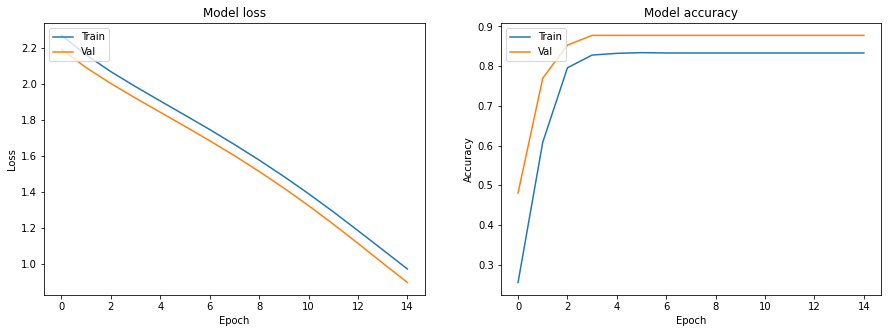

In [182]:
# Adaptado de: https://keras.io/visualization/

plt.figure(figsize=(15,5))
plt.tight_layout()

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


# Redes Neurales usando MLPClassifier

In [352]:
#Fuente: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
# Modelo usando MLPClassifier
modeloRN2 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=60)
#MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
#MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
# Entrenando el modelo
modeloRN2.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=60)

In [353]:
print (f"Exactitud del modelo MLPClassifier con datos de entrenamiento: {modeloRN2.score(x_train, y_train):.4f}")
print (f"Exactitud del modelo MLPClassifier con datos de validacion   : {modeloRN2.score(x_test, y_test):.4f}")

Exactitud del modelo MLPClassifier con datos de entrenamiento: 0.9000
Exactitud del modelo MLPClassifier con datos de validacion   : 0.8941


In [354]:
# Predicciones con valores de entrenamiento
predict_train = modeloRN2.predict(x_train)
# Predicciones con valores de prueba
predict_test = modeloRN2.predict(x_test)

In [355]:
# Matriz de confusion para pruebas
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[280   7]
 [ 29  24]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       287
           1       0.77      0.45      0.57        53

    accuracy                           0.89       340
   macro avg       0.84      0.71      0.76       340
weighted avg       0.89      0.89      0.88       340



In [356]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# accuracy: (tp + tn) / (p + n)
accuracyTest = accuracy_score(y_test, predict_test)
print('Accuracy: %f' % accuracyTest)
# precision tp / (tp + fp)
precisionTest = precision_score(y_test, predict_test)
print('Precision: %f' %  precisionTest)
# recall: tp / (tp + fn)
recallTest = recall_score(y_test, predict_test)
print('Recall: %f' % recallTest)
# f1: 2 tp / (2 tp + fp + fn)
f1Test = f1_score(y_test, predict_test)
print('F1 score: %f' % f1Test)

Accuracy: 0.894118
Precision: 0.774194
Recall: 0.452830
F1 score: 0.571429


#**GRAFICAS DE ATRIBUTOS MÁS IMPOTRTANTES PARA CASOS POSITIVOS Y NEGATIVOS**

#**COMPORTAMIENTO DE LOS ATRIBUTOS MÁS IMPORTANTES PARA CASOS DE LETALIDAD NEGATIVA**

In [ ]:
#Del Improtance encontramos el mayor numero de coincidencias en:
# 33  D_AD_ORIT	0.082561
# 32	S_AD_ORIT	0.068523
# 0	  AGE	  		0.041082
# 85	ROE		  	0.039378
# 79	L_BLOOD		0.036911


In [ ]:
tops=['D_AD_ORIT','S_AD_ORIT','AGE', 'ROE', 'L_BLOOD']

table1=mic_data5.copy()
criteria1 = table1['LETALIDAD']==0
table1.drop(table1[criteria1].index, inplace=True)
tablaSI=table1[tops]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

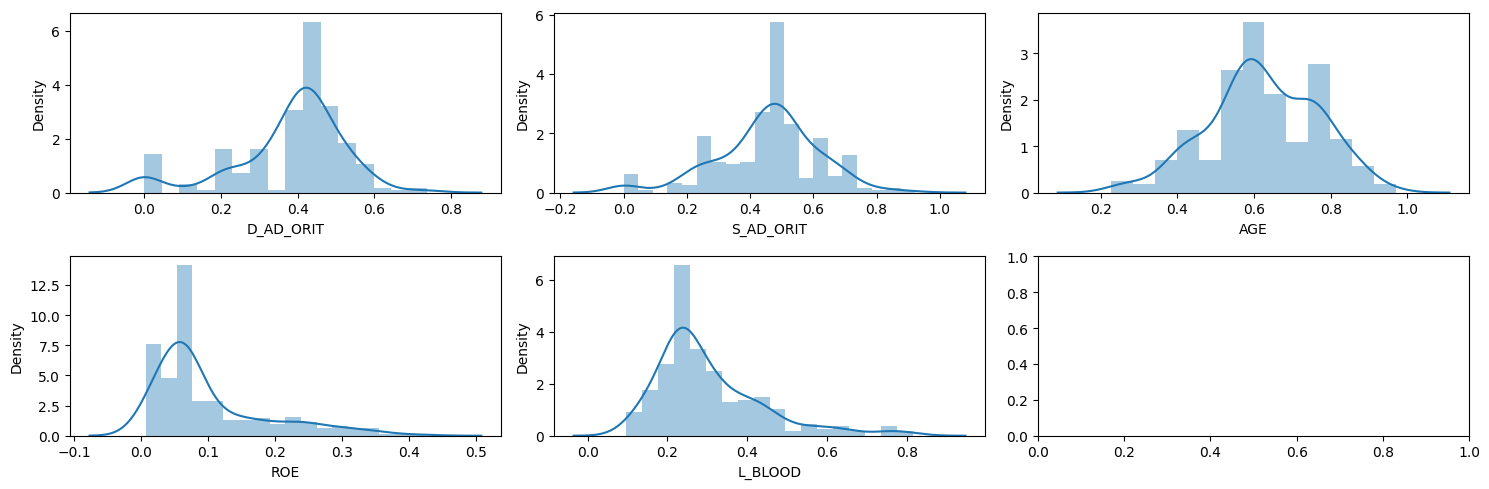

In [ ]:
width = 15
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(width, height))

for column, axe in zip(tablaSI, axes.flatten()):
    sns.distplot(tablaSI[column], ax=axe)

plt.tight_layout()

#**COMPORTAMIENTO DE LOS ATRIBUTOS MÁS IMPORTANTES PARA CASOS DE LETALIDAD POSITIVA**

Graficas de solo personas que no fallecen con los tops values.

Systolic blood pressure according to intensive care
unit.

Diastolic blood pressure according to intensive care
unit.

In [ ]:
table2=mic_data5.copy()
criteria2 = table2['LETALIDAD']== 1
table2.drop(table2[criteria2].index, inplace=True)
tablaNO=table2[tops]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

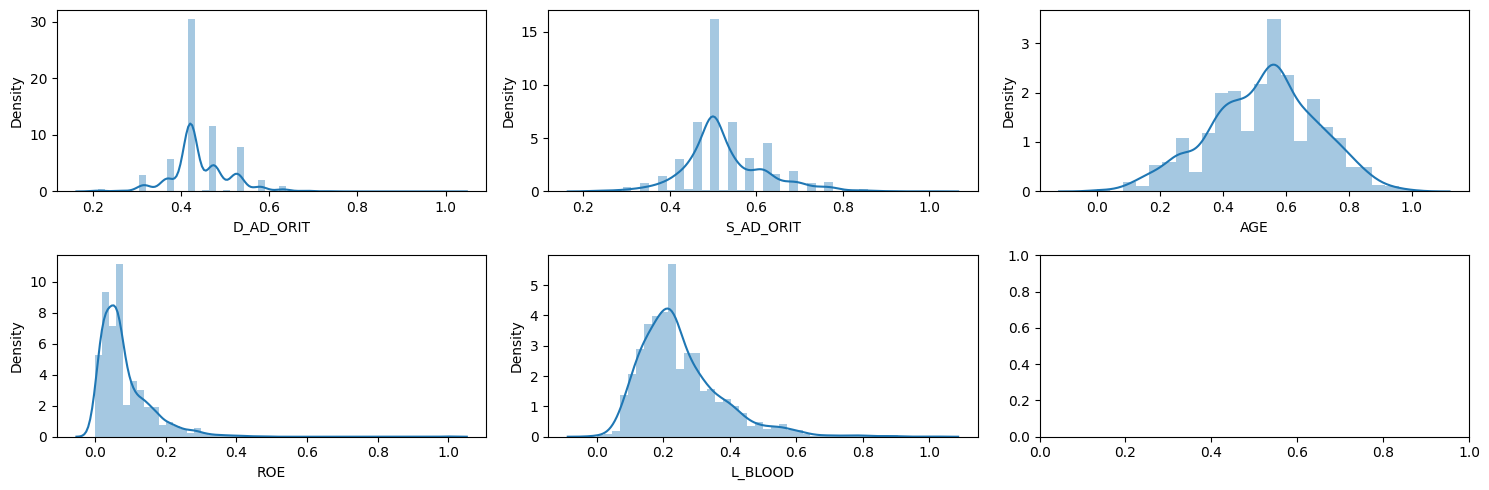

In [ ]:
width = 15
height = 5

plt.style.use("default")

figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(width, height))

for column, axe in zip(tablaNO, axes.flatten()):
    sns.distplot(tablaNO[column], ax=axe)
    
plt.tight_layout()